In [7]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# read in csv data into dataframe
merged2018 = pd.read_csv('../Cleaned/2018_merged.csv')
list(merged2018)

['Unnamed: 0',
 'ST_CASE',
 'PERSONS',
 'COUNTY',
 'CITY',
 'DAY_x',
 'MONTH_x',
 'YEAR',
 'DAY_WEEK',
 'HOUR_x',
 'MINUTE_x',
 'ROUTE',
 'TWAY_ID',
 'TWAY_ID2',
 'LATITUDE',
 'LONGITUD',
 'TYP_INT',
 'WEATHER1',
 'WEATHER2',
 'WEATHER',
 'CF1',
 'CF2',
 'CF3',
 'FATALS',
 'AGE',
 'SEX',
 'RACE',
 'REST_USE',
 'INJ_SEV',
 'REST_MIS',
 'EJECTION',
 'DRINKING',
 'ALC_RES',
 'DRUGS',
 'DOA',
 'HOSPITAL',
 'VEH_NO',
 'NUMOCCS',
 'DAY_y',
 'MONTH_y',
 'HOUR_y',
 'MINUTE_y',
 'BODY_TYP',
 'TRAV_SP',
 'DEFORMED',
 'L_STATE',
 'PREV_ACC',
 'PREV_DWI',
 'PREV_SPD',
 'VNUM_LAN',
 'VSPD_LIM',
 'ACC_TYPE',
 'DEATHS',
 'DR_DRINK',
 'Year']

In [12]:
# assign X and y data for model training
X = merged2018.DR_DRINK.values.reshape(-1,1)
y = merged2018.DAY_WEEK.values.reshape(-1,1)

print("Shape: ", X.shape, y.shape)


Shape:  (928, 1) (928, 1)


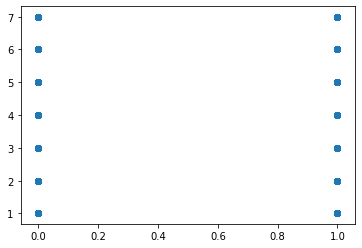

In [13]:
plt.scatter(X,y)
# plt.xlabel("")
# plt.ylabel("Injury Severity")

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [15]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.12044171]]
y-axis intercept:  [4.55225989]


In [17]:
predictions = model.predict(X)

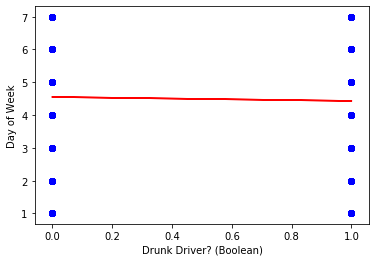

In [20]:
plt.scatter(X, y, c='blue')
plt.xlabel("Drunk Driver? (Boolean)")
plt.ylabel("Day of Week")
plt.plot(X, predictions, c='red')

In [14]:
from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X_test)
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 3.3313281992877974
R-squared (R2 ): 0.007212255279575586


In [16]:
model.score(X_test, y_test)

0.007212255279575585